In [1]:
import pandas as pd
import pickle
import random
pd.set_option('display.max_columns',100)

from collections import Counter
%matplotlib inline

In [142]:
from bokeh.plotting import figure 
from bokeh.io import output_notebook, show
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

In [3]:
output_notebook()


Loading BokehJS ...

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [5]:
newsData = pd.read_pickle('../Data/Feedly_Processed_DF_cleaned.pkl')
sectorLabels = pd.read_csv('../Data/Labeled_Data/sectors.csv')[['article_id','top_sector','Sectors']]

In [6]:
articles_df = pd.merge(newsData,sectorLabels, on='article_id')[['article_id','title','article_text','top_sector']]
articles_df['content'] = articles_df['title'] + " \n" + articles_df['article_text']
articles_df['sector'] = articles_df['top_sector']
articles_df.head()

,article_id,title,article_text,top_sector,content,sector
0,5eca9220,"AfDB, GCF partner on 'Desert-to-Power' scheme","The African Development Bank (AfDB), Green Cli...",MISC,"AfDB, GCF partner on 'Desert-to-Power' scheme ...",MISC
1,ee5530a3,AIIB approves $1.5 bln of loans to India for i...,"NEW DELHI, Feb 27 (Reuters) - China-based Asia...",transport,AIIB approves $1.5 bln of loans to India for i...,transport
2,185416ad,"India, ADB sign USD 250 million loan agreement...",Here are some suggestions that matches your en...,transport,"India, ADB sign USD 250 million loan agreement...",transport
3,ef56fb55,EIB approves $1.8bn financing for Trans-Adriat...,Compelo is using cookies\n\nWe use them to giv...,energy,EIB approves $1.8bn financing for Trans-Adriat...,energy
4,85f28676,EBRD increases its portfolio in Azerbaijan,"Baku, Azerbaijan, April 9\n\nBy Anvar Mammadov...",industry and trade,EBRD increases its portfolio in Azerbaijan \nB...,industry and trade


In [7]:
projects_df = pd.read_csv('../Data/EWS_Published Project_Listing_DD.csv', encoding='ISO-8859-1')


In [8]:
projects_df.head()

,EWS ID,ProjectNumber,Published,Bank Risk Rating,Project Status,EWS URL,Detailed Analysis URL,Project Name,City,Country Count,Country 1,Country 2,Country 3,Country 4,Country 5,Country 6,Country 7,Country 8,Country 9,Country 10,Country 11,Country 12,Borrower or Client,Private Actor Count,Private Actor 1,Private Actor 2,Private Actor 3,Private Actor 4,Private Actor 5,Private Actor 6,Private Actor 7,Private Actor 8,Private Actor 9,Private Actor 10,Private Actor 11,Private Actor 12,Private Actor 13,Private Actor 14,Private Actor 15,Bank Count,Bank 1,Bank 2,Bank 3,Bank 4,Bank 5,Sector Count,Sector 1,Sector 2,Sector 3,Sector 4,Sector 5,Sector 6,Sector 7,Last Edited,Date Scraped,Date Disclosed,Board Date,Source URL,Project Cost,Investment Amount,Project Description,Contact Information
0,29164,AFDB-P-TN-BB0-007,Published,U,Proposed,https://ews.rightsindevelopment.org/projects/p...,NaN,TUNISIA FERTILIZER PROJECT,NaN,1,Tunisia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,African Development Bank (AFDB),NaN,NaN,NaN,NaN,1,Agriculture and Forestry,NaN,NaN,NaN,NaN,NaN,NaN,9/4/17,8/15/17,12/13/01,12/13/01,http://www.afdb.org/en/projects-and-operations...,NaN,NaN,None,ACCOUNTABILITY MECHANISM OF AfDB\r\r\r\rThe In...
1,29166,AFDB-P-SZ-HAA-001,Published,U,Approved,https://ews.rightsindevelopment.org/projects/p...,NaN,LINE OF CREDIT TO SWAZILAND DEVELOPMENT FINANC...,NaN,1,Swaziland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,African Development Bank (AFDB),NaN,NaN,NaN,NaN,2,Finance,Industry and Trade,NaN,NaN,NaN,NaN,NaN,9/4/17,8/15/17,12/13/01,5/12/17,http://www.afdb.org/en/projects-and-operations...,4.76,1.36,None,MACHARIA Lilian Wanjiru - PIFD1\r\r\r\rACCOUNT...
2,29931,IADB-UR-T1100,Pending,C,Approved,https://ews.rightsindevelopment.org/projects/u...,NaN,Supporting INEFOP in Improving Labor Training ...,NaN,1,Uruguay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Inter-American Development Bank (IADB),NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/3/17,12/31/99,7/16/13,http://www.iadb.org/en/projects/project-descri...,0.44,0.44,NaN,NaN
3,30104,IADB-BR-T1279,Pending,C,Approved,https://ews.rightsindevelopment.org/projects/b...,NaN,"Racial Equality and Social, Economic, Politica...",NaN,1,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Inter-American Development Bank (IADB),NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/3/17,12/31/99,6/4/13,http://www.iadb.org/en/projects/project-descri...,0.97,0.82,NaN,NaN
4,30322,IADB-PE-T1297,Pending,C,Approved,https://ews.rightsindevelopment.org/projects/p...,NaN,Adaptation to Climate Change of the Fishery Se...,NaN,1,Peru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Inter-American Development Bank (IADB),NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/3/17,12/31/99,12/4/13,http://www.iadb.org/en/projects/project-descri...,1.50,1.50,NaN,NaN


In [9]:
projects_df['Project Description'] = projects_df['Project Description'].fillna("")

In [10]:
detailed_projects_df = projects_df[ projects_df['Project Description'].apply(lambda x : len(x.split())) > 300 ]

In [11]:
detailed_projects_df = detailed_projects_df[['Project Name','Sector 1','Project Description']]
detailed_projects_df['content'] = detailed_projects_df['Project Name'] + "\n" +  detailed_projects_df['Project Description']
detailed_projects_df.head()

,Project Name,Sector 1,Project Description,content
40,India: National Cyclone Risk Mitigation Projec...,Climate and Environment,The National Cyclone Risk Mitigation Project I...,India: National Cyclone Risk Mitigation Projec...
43,Cusco Regional Development,Industry and Trade,The Cusco Regional Development Project is loca...,Cusco Regional Development\nThe Cusco Regional...
60,IN Uttar Pradesh Water Sector Restructuring Pr...,Water and Sanitation,World Bank documentation indicates that this p...,IN Uttar Pradesh Water Sector Restructuring Pr...
95,Abidjan-Lagos Trade and Transport Facilitation...,Technical Cooperation,The development objective of the Second Adapta...,Abidjan-Lagos Trade and Transport Facilitation...
101,Coastal Watersheds Conservation in the Context...,Agriculture and Forestry,"According to The Bank, the goal of the project...",Coastal Watersheds Conservation in the Context...


In [12]:
detailed_projects_df = detailed_projects_df.rename(columns = {'Project Name':'title','Sector 1': 'sector'})
#detailed_projects_df['sector'] = detailed_projects_df['Sector 1']

In [13]:
detailed_projects_df.columns

Index(['title', 'sector', 'Project Description', 'content'], dtype='object')

In [14]:
articles_df.head()

,article_id,title,article_text,top_sector,content,sector
0,5eca9220,"AfDB, GCF partner on 'Desert-to-Power' scheme","The African Development Bank (AfDB), Green Cli...",MISC,"AfDB, GCF partner on 'Desert-to-Power' scheme ...",MISC
1,ee5530a3,AIIB approves $1.5 bln of loans to India for i...,"NEW DELHI, Feb 27 (Reuters) - China-based Asia...",transport,AIIB approves $1.5 bln of loans to India for i...,transport
2,185416ad,"India, ADB sign USD 250 million loan agreement...",Here are some suggestions that matches your en...,transport,"India, ADB sign USD 250 million loan agreement...",transport
3,ef56fb55,EIB approves $1.8bn financing for Trans-Adriat...,Compelo is using cookies\n\nWe use them to giv...,energy,EIB approves $1.8bn financing for Trans-Adriat...,energy
4,85f28676,EBRD increases its portfolio in Azerbaijan,"Baku, Azerbaijan, April 9\n\nBy Anvar Mammadov...",industry and trade,EBRD increases its portfolio in Azerbaijan \nB...,industry and trade


In [89]:
merged_df = pd.concat(
    
    [
        detailed_projects_df[['title','content','sector']]
        , articles_df[['title','content','sector']]
    ])

In [90]:
merged_df = merged_df[~pd.isnull(merged_df['sector'])]

In [91]:
merged_df['sector'] = merged_df['sector'].apply(lambda x : x.lower())

In [94]:
merged_df=merged_df.drop_duplicates(['title'])

In [95]:
len(merged_df)

569

In [96]:
merged_df.head()

,title,content,sector
40,India: National Cyclone Risk Mitigation Projec...,India: National Cyclone Risk Mitigation Projec...,climate and environment
43,Cusco Regional Development,Cusco Regional Development\nThe Cusco Regional...,industry and trade
60,IN Uttar Pradesh Water Sector Restructuring Pr...,IN Uttar Pradesh Water Sector Restructuring Pr...,water and sanitation
95,Abidjan-Lagos Trade and Transport Facilitation...,Abidjan-Lagos Trade and Transport Facilitation...,technical cooperation
101,Coastal Watersheds Conservation in the Context...,Coastal Watersheds Conservation in the Context...,agriculture and forestry


In [97]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import manifold
from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [98]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)

In [99]:
?TfidfVectorizer

In [100]:
from collections import Counter
c = Counter(merged_df['sector'])
most_common_sectors = [ sector for (sector, count) in c.most_common(6) ]
most_common_sectors

['energy',
 'finance',
 'transport',
 'infrastructure',
 'agriculture and forestry',
 'education and health']

In [101]:
common_sectors_df = merged_df[merged_df['sector'].isin(most_common_sectors)]

In [102]:
tfidf  = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.9)

#data = merged_df['content'] 
#docs   = tfidf.fit_transform(data)
#labels = merged_df['sector']


data = common_sectors_df['content'] 
docs   = tfidf.fit_transform(data)
labels = common_sectors_df['sector']


In [128]:
X

<436x3037 sparse matrix of type '<class 'numpy.float64'>'
	with 63304 stored elements in Compressed Sparse Row format>

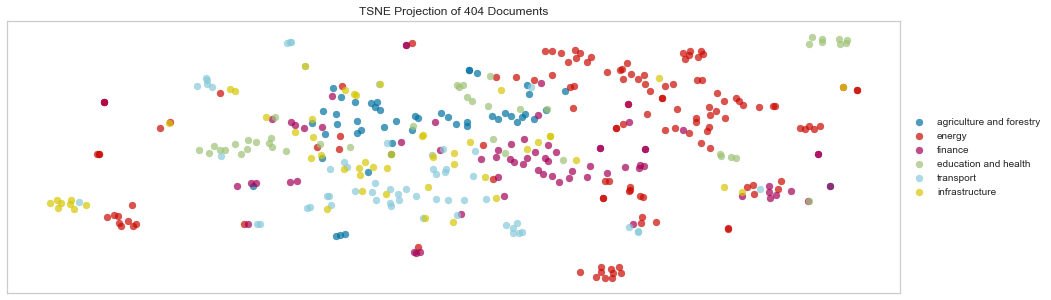

In [103]:
# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(docs, labels)
tsne.poof()

In [140]:
len(labels)

404

In [145]:
import numpy as np
from sklearn.manifold import TSNE
X = docs
X_embedded = TSNE(n_components=2, random_state=0).fit_transform(X.todense())
X_embedded.shape

(404, 2)

In [ ]:
X.shapeape

In [144]:
len(labels)

404

In [126]:
TSNEVisualizer(ax=None, decompose='svd', decompose_by=50, labels=None, classes=None, colors=None, colormap=None, random_state=None, **kwargs)

In [127]:
?TSNE

In [106]:
most_common_sectors

['energy',
 'finance',
 'transport',
 'infrastructure',
 'agriculture and forestry',
 'education and health']

In [109]:
from bokeh.palettes import Spectral6

In [110]:
import bokeh.palettes

In [111]:
bokeh.palettes.Accent8

['#7fc97f',
 '#beaed4',
 '#fdc086',
 '#ffff99',
 '#386cb0',
 '#f0027f',
 '#bf5b17',
 '#666666']

In [123]:
from math import sin
from random import random

from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper
from bokeh.palettes import plasma
from bokeh.plotting import figure
from bokeh.transform import transform


source = ColumnDataSource(dict(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    title=common_sectors_df['title'],
    label=labels
))


hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("(x,y)", "(@x, @y)"),
    ('title', '@title'),
    ('label', '@label'),
])
color_mapper = CategoricalColorMapper(factors=labels.unique(), palette=bokeh.palettes.Accent8)

p = figure(plot_width=1200, plot_height=1000, tools=[hover], title="TSNE")
p.circle('x', 'y', size=10, source=source,
         color={'field': 'label', 'transform': color_mapper},
         legend='label')

#output_file('test.html')
show(p)

/usr/local/anaconda3/envs/datakind/lib/python3.6/site-packages/bokeh/models/sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('label', 404), ('title', 404), ('x', 436), ('y', 436)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


In [146]:
X.shape

(404, 2940)

In [147]:
len(labels)

404

In [163]:
labels.value_counts()

energy                      129
finance                      71
transport                    58
infrastructure               53
agriculture and forestry     49
education and health         44
Name: sector, dtype: int64

In [158]:
neigh = KNeighborsClassifier(n_neighbors=6).fit(X,labels)

In [159]:
labels[0:5]

101    agriculture and forestry
235                      energy
399                      energy
403                      energy
406                      energy
Name: sector, dtype: object

In [160]:
neigh.predict(X)[0:5]

array(['infrastructure', 'energy', 'energy', 'energy', 'energy'],
      dtype=object)

In [161]:
from sklearn.metrics import accuracy_score

In [162]:
accuracy_score(y_true= labels, y_pred=neigh.predict(X))

0.7846534653465347

In [167]:
data.iloc[[1,5]]

235    Senegal Banda Gas to Power Guarantee\nAccordin...
484    Adjaristsqali Hydro Project\nThe investment pr...
Name: content, dtype: object

In [164]:
X

<404x2940 sparse matrix of type '<class 'numpy.float64'>'
	with 59594 stored elements in Compressed Sparse Row format>

In [149]:
A = neigh.kneighbors_graph(X)

<404x404 sparse matrix of type '<class 'numpy.float64'>'
	with 1616 stored elements in Compressed Sparse Row format>

In [131]:
nbrs = NearestNeighbors(n_neighbors=4, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

/usr/local/anaconda3/envs/datakind/lib/python3.6/site-packages/sklearn/neighbors/base.py:212: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


In [ ]:
nbrs.q

In [ ]:
>>> X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
>>> nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
>>> distances, indices = nbrs.kneighbors(X)